# ANOVA

# Assumptions
## Assumption of normality 
## Homogeneity of variance across groups
## Observations are sampled independently from each other

## Assumption can be violated if
## When sample size is large or normality test
## Nearly equal sample sizes and ratio of any two  variances does not exceed 4 or  (Levene’s or Bartlett’s Test)
## Random experiment

# Example 1

In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
df = pg.read_dataset('anova')
df.columns = ['Subject', 'Hair_color', 'Pain_threshold']
df

,Subject,Hair_color,Pain_threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48
5,6,Dark Blond,63
6,7,Dark Blond,57
7,8,Dark Blond,52
8,9,Dark Blond,41
9,10,Dark Blond,43


In [2]:
df['Hair_color'].value_counts()

Light Blond       5
Dark Blond        5
Dark Brunette     5
Light Brunette    4
Name: Hair_color, dtype: int64

In [3]:
df['Hair_color'].unique()

array(['Light Blond', 'Dark Blond', 'Light Brunette', 'Dark Brunette'],
      dtype=object)

# ANOVA table using bioinfokit

In [4]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='Pain_threshold', anova_model="Pain_threshold ~ C(Hair_color)")
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Hair_color),3.0,1360.726316,453.575439,6.791407,0.004114
Residual,15.0,1001.800000,66.786667,NaN,NaN


# ANOVA table using pingouin

In [5]:
aov = pg.anova(dv='Pain_threshold', between='Hair_color', data=df, detailed=True)
aov.round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Hair_color,1360.726,3,453.575,6.791,0.004,0.576
1,Within,1001.800,15,66.787,NaN,NaN,NaN


In [6]:
df['Group'] = df.groupby('Hair_color')['Hair_color'].rank(method="first", ascending=True)
df

,Subject,Hair_color,Pain_threshold,Group
0,1,Light Blond,62,1.0
1,2,Light Blond,60,2.0
2,3,Light Blond,71,3.0
3,4,Light Blond,55,4.0
4,5,Light Blond,48,5.0
5,6,Dark Blond,63,1.0
6,7,Dark Blond,57,2.0
7,8,Dark Blond,52,3.0
8,9,Dark Blond,41,4.0
9,10,Dark Blond,43,5.0


In [7]:
df_pivot = df.pivot(index='Group', columns='Hair_color', values='Pain_threshold')
df_pivot

Hair_color,Dark Blond,Dark Brunette,Light Blond,Light Brunette
Group,,,,
1.0,63.0,32.0,62.0,42.0
2.0,57.0,39.0,60.0,50.0
3.0,52.0,51.0,71.0,41.0
4.0,41.0,30.0,55.0,37.0
5.0,43.0,35.0,48.0,NaN


In [8]:
df_pivot['Light Brunette'][1:4]

Group
1.0    42.0
2.0    50.0
3.0    41.0
4.0    37.0
Name: Light Brunette, dtype: float64

# ANOVA table using Scipy

In [9]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df_pivot['Dark Blond'], df_pivot['Dark Brunette'], df_pivot['Light Brunette'][1:4], df_pivot['Light Blond'])
print(fvalue, pvalue)
alpha = 0.05
if (pvalue > alpha):
    print("There are NO significant differences among Pain threshold")
else:
    print("There are significant differences among Pain threshold")

6.791407046264097 0.004114227333077399
There are significant differences among Pain threshold


# Assumption of normality

In [10]:
res.anova_std_residuals

0     0.342620
1     0.097892
2     1.443900
3    -0.513931
4    -1.370481
5     1.443900
6     0.709714
7     0.097892
8    -1.248117
9    -1.003388
10   -0.061182
11    0.917733
12   -0.183547
13   -0.673004
14   -0.660768
15    0.195783
16    1.664156
17   -0.905497
18   -0.293675
dtype: float64

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

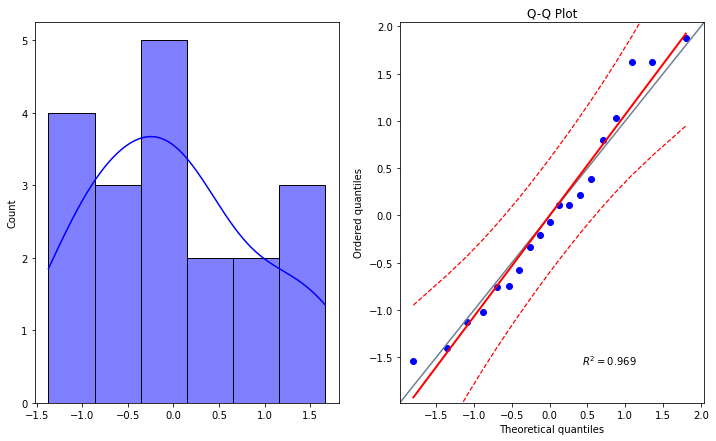

In [11]:
# plots for standard distribution
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(res.anova_std_residuals,kde=True, color ='blue',ax=ax[0])
pg.qqplot(res.anova_std_residuals, dist='norm', ax=ax[1])

# Statistical normality test (D Agostino K square test)

In [12]:
pg.normality(res.anova_std_residuals, method='normaltest')

C:\ProgramData\Miniconda3\envs\cdev3.7\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


,W,pval,normal
0,1.137275,0.566296,True


# The assumption of Homogeneity of variance (Levene’s or Bartlett’s Test)

In [13]:
#For stacked df
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df, res_var='Pain_threshold', xfac_var='Hair_color')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.3927
1,Degrees of freedom (Df),3.0000
2,p value,0.7600


# Example 2

In [14]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


# ANOVA table using Scipy

In [15]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns anova stats value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
alpha = 0.05
if (pvalue > alpha):
    print("There are NO significant differences among treatments")
else:
    print("There are significant differences among treatments")

17.492810457516338 2.639241146210922e-05
There are significant differences among treatments


In [16]:
# Reshape the dataframe (Stacked df for bioinfokit and pingouin)
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt.columns = ['index', 'treatments', 'value']

In [17]:
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


# Anova using pingouin

In [18]:
aov = pg.anova(dv='value', between='treatments', data=df_melt, detailed=True)
aov.round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,treatments,3010.95,3,1003.650,17.493,0.0,0.766
1,Within,918.00,16,57.375,NaN,NaN,NaN


# Anova using Bioinfokit

In [19]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


# To check the assumption of normality

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

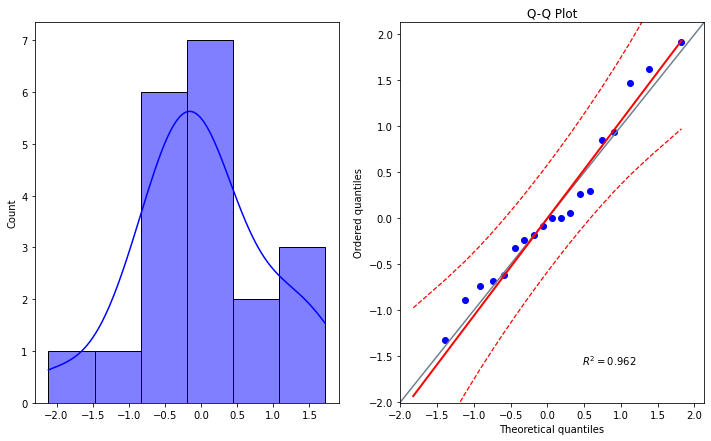

In [20]:
# plots for standard distribution
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(res.anova_std_residuals,kde=True, color ='blue',ax=ax[0])
pg.qqplot(res.anova_std_residuals, dist='norm', ax=ax[1])

# Statistical normality test (D Agostino K square test)

In [21]:
pg.normality(res.anova_std_residuals, method='normaltest')

,W,pval,normal
0,0.549218,0.759869,True


# The assumption of homogeneity of variance (Levene’s or Bartlett’s Test)

In [22]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.9220
1,Degrees of freedom (Df),3.0000
2,p value,0.1667


# To Un melt use pivot

In [23]:
df_melt.pivot(columns='treatments', index='index')

value            
treatments     A   B   C   D
index                       
0             25  45  30  54
1             30  55  29  60
2             28  29  33  51
3             36  56  37  62
4             29  40  27  73

In [24]:
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73
